<h1><center><span style="color:blue">Time Series Based Analysis and Forecasting </span></center></h1>

<h3> <span style="color:orange">Table of Contents</span></h3>

1. Introduction 
2. Libraries Used 
3. ARIMA Model Forecasting 
4. LSTM Model Forecasting 
5. Model Comparisons 
6. Conclusion 
7. Future Work
8. References


<h3 align = "center"> Introduction </h3>

Functionally, time series is described as a set of random variables measured against time. In machine learning it can have various roles, such as, identifying the components of a trend and making predictions based on it. It represents a series of time-based orders. The unit of measurement could be as huge as a decade or as small as a second. It is considered to be an observation of the sequence of discrete time of successive intervals. 

<h3 align = "center"> Meaning of Time Series and Forecasting: </h3>

‘Time Series’ describes our graphical output of the predictions made on the dataset. Forecasting means using statistics and modeling to generate predictions from our given dataset.
<img src="https://www.springboard.com/blog/wp-content/uploads/2022/09/time-series-forecasting-overview.png"  width="400" height="400" align = "center">






<h3 align = "center"> History: </h3>

Early machine learning in time series dates back to the mid 1900s. In 1969, researchers explored the idea of combining forecasts to enhance their performances and bring out the best models. 
In the late 1980s, machine learning enthusiasts proposed various new methods of utilizing this domain, some examples being:
 - Anomaly detection - to identify intrusions in a network
 - Dynamic time warping - used to measure the similarity of time series 
 - Recursive neural networks - to extract useful patterns from corrupted data
 <img src=" https://www.researchgate.net/profile/Mohsin-Munir/publication/333448095/figure/fig2/AS:763831148109829@1559122945986/Forecasting-and-anomaly-detection-results-of-FuseAD-on-the-TS11-time-series-from-the_W640.jpg"  width="400" height="400" align = "center">



<h3 align = "center"> Progress: </h3>

Nowadays, Time Series and Forecasting is a part of almost every aspect of life. From economics to medicine, we observe it in almost every possible field. We have come up with several models, algorithms to discover the most accurate method for our projects. In our code, we have made the use of ARIMA (AutoRegressive Integrated Moving Average) and LSTM (Long Short-Term Memory)
 <img src="https://av-eks-blogoptimized.s3.amazonaws.com/39815Components%20of%20Time%20Series%20Analysis.png"  width="400" height="400" align = "center">


<h3 align = "center"> Our Project: </h3>

- Topic: Number of estimated submissions per year

- Dataset: https://www.kaggle.com/datasets/kaggle/meta-kaggle

- Logic:
Preprocess the Data Using EDA (Exploratory Data Analysis) , analyze the text , find the frequency of words and list them under top 10 most common words.
Perform group by - competitions launch date vs count

- Models Used:



  - ARIMA

A mathematical model that uses previous values to represent the time series values forms the basis of ARIMA. This concept is founded on two key components: 

Past Values: Past behavior is unquestionably a reliable indicator of future behavior. The only uncertainty is the appropriate number of historical values. The most recent p time series data are used as features in the model. In this case, p is a hyperparameter that must be chosen while creating the model.

Past Mistakes: The model can benefit from the knowledge of its past performance levels. As a result, we include the model's most recent q mistakes as features. Q is a hyperparameter once more.   
This situation calls for the time series to be standardized to make the model independent of seasonal or cyclical tendencies. To put it formally, we want the model to be trained on a stationary time series. In its most basic form, stationarity refers to the absence of change in the statistical characteristics of a process producing a time series.

In our code, ARIMA is used to: 
- Change the datatype according to our model 
- Get the forecast by inserting this modified data
- Plot the same to analyze our predicted results - actual vs forecast
        

  - LSTM 
 
The basic goal of LSTM cells is to remember the crucial portions of the sequence that have already been seen while forgetting the less crucial ones. This is accomplished by the so-called gates, or functions with various learning goals, such as, a concise description of the time series that has been observed thus far, together with information on how to mix new data with the series' historical representation and what information to ignore. 

In our code, LSTM is used to:

 - Prepare and normalize the data
 - Split into Test and Train sets
 - Prepare the training data and reshape it 
 - Build the LSTM model
 - Train the model
 - Prepare the test data and perform predictions on it 
 - Trim the data and predictions to the required length
 - Visualize the forecast

Import the necessary library - nltk

- download stopwords - for list of common stop words

- download punkt - for tokenizing text into words or sentences

- download vader_lexicon - for lexicon to utilize in sentiment analysis

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

1) Read the kaggle writeups csv file

2) Check the dimensions of the dataset

3) Plot the set of number of competitions launched vs year

4) Analyse the text

   - store list of stop words in english
   
   - preprocess the text by tokenizing it
   
   - apply the preprocessing to the writeup and extract top 10 most common words observed
   
   - analyse the sentiment of the text
   
5) For Time Series Forecasting, groupby competition launch date and count

6) Use ARIMA model to forecast the data


Firstly, all the necessay libraries are imported, as shown below:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from statsmodels.tsa.arima.model import ARIMA

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Next, we load the given data as depicted:

In [5]:
# Step 1: Load the data
df = pd.read_csv("/kaggle/input/2023-kaggle-ai-report/kaggle_writeups_20230510.csv")

Now, we perform the Exploratory Data Analysis (EDA):

In [6]:
# Step 2: Exploratory Data Analysis (EDA)
# Check dimensions of the dataset
print("Dataset Dimensions:", df.shape)

Dataset Dimensions: (3127, 7)


In [7]:
df.isnull().sum()

Competition Launch Date    0
Title of Competition       0
Competition URL            0
Date of Writeup            0
Title of Writeup           0
Writeup                    2
Writeup URL                0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

Competition Launch Date    0
Title of Competition       0
Competition URL            0
Date of Writeup            0
Title of Writeup           0
Writeup                    0
Writeup URL                0
dtype: int64

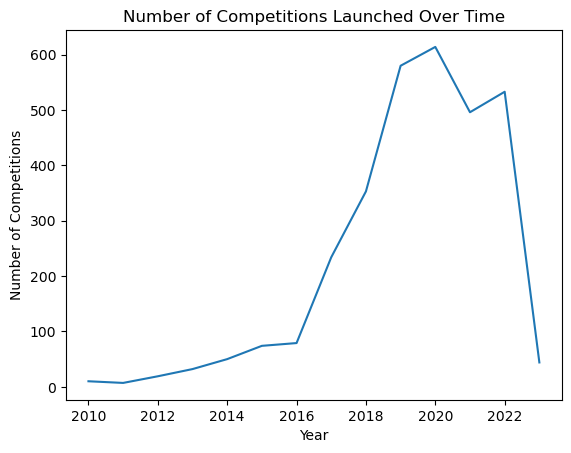

In [10]:
# Explore competition launch dates
df['Competition Launch Date'] = pd.to_datetime(df['Competition Launch Date'])
df['Year'] = df['Competition Launch Date'].dt.year
competition_counts = df['Year'].value_counts().sort_index()
plt.plot(competition_counts.index, competition_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Competitions')
plt.title('Number of Competitions Launched Over Time')
plt.show()

Through our initial analysis, we observe that there are a total of 3127 records, with 2 missing values for the 'Writeup' column. Since, 2 is a really small number as compared to the total number of records, we drop the 2 null values. Then, we explore the launch dates to build our foundation for the analysis. Variable competition_counts stored the year of the competition. plt.plot was used to plot the data. We then proceeded to label the x and y axes. The plot gave us a count of number of competitions over time. We can see that, the number of competitions increased significantly from the year 2016 and currently in the year 2023 it is still being monitored. 


In [11]:
# Step 3: Text Data Analysis
# Preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    if pd.isnull(text) or isinstance(text, float):
        return ''
    tokens = word_tokenize(text.lower())
    tokens = [stemmer.stem(token) for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(tokens)

df['Processed Writeup'] = df['Writeup'].apply(preprocess_text)

The above is for textual analysis: stop_words is a set of all stop words in english (for example, ‘and’).  stemmer  
finds the root for similar words. Function preprocess_text is  used on the text. ps.isnull() checks for empty strings/ null values. Tokens received from word_tokenize are stored in the variable tokens and returned. The function is then applied to the Writeup

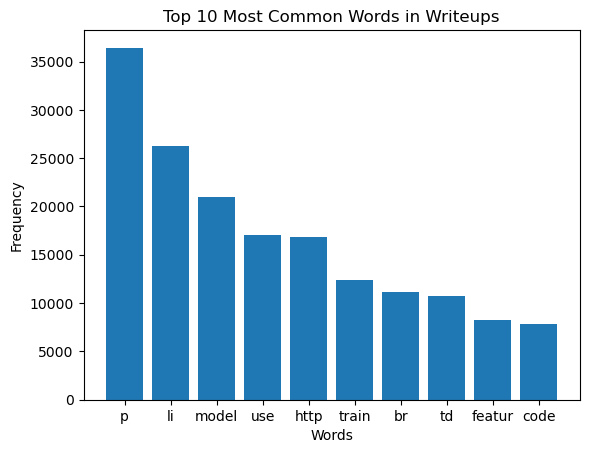

In [12]:
# Frequency analysis
word_freq = pd.Series(' '.join(df['Processed Writeup']).split()).value_counts()[:10]
plt.bar(word_freq.index, word_freq.values)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Writeups')
plt.show()

# Sentiment analysis
sid = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Writeup'].apply(lambda x: sid.polarity_scores(str(x))['compound'])


Through the above plot, it is evident that some of the most common words in the submissions are pertaining to 'http','model','train','code' and 'featur'. At first glance, we note that the competitions are usually inclined towards something to do with web application, model training and feature analysis.

Now, on our given data we apply time series forecasting, to predict how many competitions might be held in the future.

<h3> Model 1: ARIMA </h3>

In [13]:
# Step 4: Time Series Forecasting
# Assuming "Competition Launch Date" as the time-related variable
time_series = df.groupby('Competition Launch Date').size().reset_index(name='Count')
time_series = time_series.set_index('Competition Launch Date')

# ARIMA forecasting
model = ARIMA(time_series['Count'], order=(1, 1, 1))
model_fit = model.fit()
forecast_start = time_series.index.max() + pd.DateOffset(days=1)
forecast_end = forecast_start + pd.DateOffset(days=190)
forecast_index = pd.date_range(start=forecast_start, end=forecast_end, freq='D')
forecast = model_fit.get_forecast(steps=len(forecast_index)).predicted_mean


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Time Series ForeCasting - time_series groups by competition launch date and sets index to count. 

ARIMA forecasting:
- model - initializes ARIMA model object
- model_fit - fits the model to the data
- forecast_start - determines start date for forecast
- forecast_end - determines end date for forecast
- forecast_index - creates data range from start to end
- predicted_mean - contains forecasted values


Display the forecast

In [14]:
forecast

309    15.332340
310    15.565309
311    15.553681
312    15.554262
313    15.554233
         ...    
495    15.554234
496    15.554234
497    15.554234
498    15.554234
499    15.554234
Name: predicted_mean, Length: 191, dtype: float64

Plot the time series data - Date vs Count

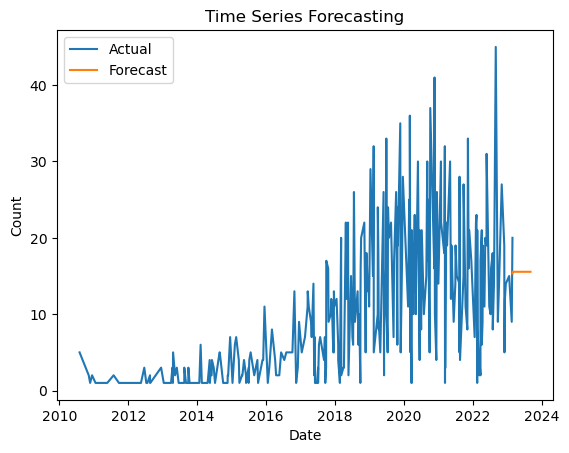

In [15]:
plt.plot(time_series.index, time_series['Count'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Time Series Forecasting')
plt.legend()
plt.show()

<h3> Model 2: LSTM </h3>

In [16]:
!pip install tensorflow keras

1) Import libraries - pandas, numpy , matplotlib, keras and sklearn

2) To perform time series forecasting using LSTM we will follo the belo steps:

     - format the data
     
     - normalize using scaler
     
     - split into test and train sets
     
     - prepare training data
     
     - build LSTM model
     
     - train the model on train set
     
     - prepare test data
     
     - use it for predictions
     
     - trim test data accordingly
     
     - plot the forecast
     

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Epoch 1/100
15/15 [==============================] - 4s 11ms/step - loss: 0.0398
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0283
Epoch 3/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0257
Epoch 4/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0247
Epoch 5/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0244
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0245
Epoch 8/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0251
Epoch 9/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0249
Epoch 10/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0245
Epoch 11/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0247
Epoch 12/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0245
Epoch 13/100
15/15 [================

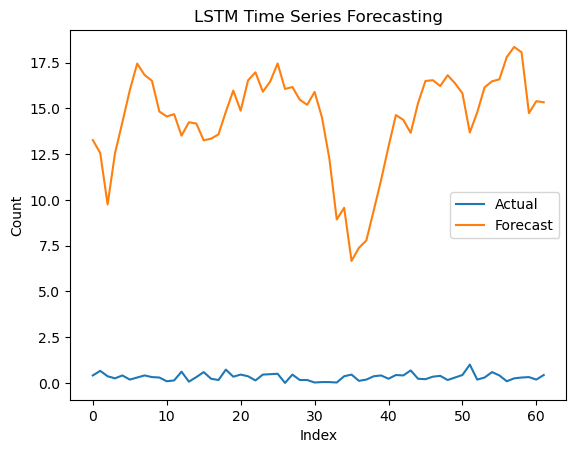

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Step 4: Time Series Forecasting using LSTM
# Prepare the data
time_series['Count'] = time_series['Count'].astype(float)
data = time_series['Count'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Split the data into train and test sets
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Prepare the training data
look_back = 7  # Number of previous time steps to use for prediction
X_train, y_train = [], []
for i in range(len(train_data) - look_back):
    X_train.append(train_data[i:i + look_back, 0])
    y_train.append(train_data[i + look_back, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16)

# Prepare the test data
inputs = data_scaled[len(data_scaled) - len(test_data) - look_back:]
X_test = []
for i in range(look_back, len(inputs)):
    X_test.append(inputs[i - look_back:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


# Trim the test_data and predictions to match the length of time_series
test_data_trimmed = test_data[:len(predictions)]
time_series_trimmed = time_series[train_size + look_back:train_size + look_back + len(predictions)]

# Create a range of indices for the x-axis
x_axis = range(len(predictions))

# Visualize the forecast
plt.plot(x_axis, test_data_trimmed, label='Actual')
plt.plot(x_axis, predictions, label='Forecast')
plt.xlabel('Index')
plt.ylabel('Count')
plt.title('LSTM Time Series Forecasting')
plt.legend()
plt.show()




1) Convert the forecastes dates to dataframe

2) Visualize it 

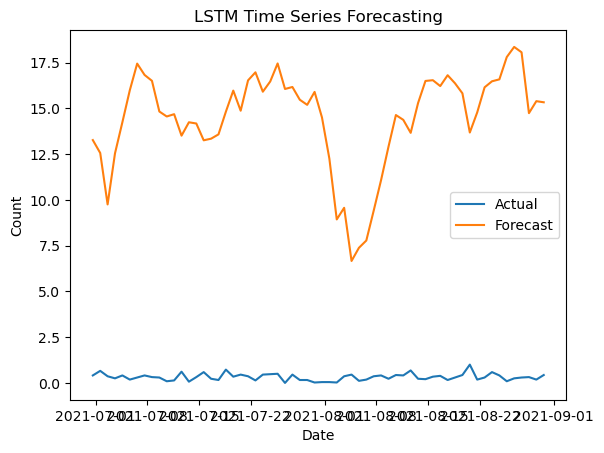

In [18]:
# Convert the forecasted dates to a pandas DateTimeIndex
forecast_dates = pd.date_range(start=time_series.index[train_size + look_back], periods=len(predictions), freq='D')

# Visualize the forecast
plt.plot(forecast_dates, test_data[:len(predictions)], label='Actual')
plt.plot(forecast_dates, predictions, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('LSTM Time Series Forecasting')
plt.legend()
plt.show()


The code starts to exexute by data preparation. It converts the 'Count' column in the 'time_series' DataFrame to float and reshapes it. Once this transformation is done, normalization is applied on the data using MinMaxScaler to ensure it falls within the range of 0 to 1. Next, train - test split is done on the data, with 80% for training data and 20% for testing data. In training data, the input sequences and corresponding target values are created based on a specified look-back period. The LSTM model is implemented using Keras library, consisting of two LSTM layers and a dense output layer. The optimizer used for the training data is Adam optimizer and mean squared error loss function. For testing data, input sequences are prepared for the test data. This model makes a prediction for the target values for the test data, which are further transformed back to the original scale. The test data and predictions are then shrortened to match the length of the original time series data. Finally, the forecasted and actual values are visualized.

<h3><center><span style="color:black">Conclusion </span></center></h3>

In conclusion, we have demonstrated how two time series forecasting models: LSTM and ARIMA, can predict complex patterns within the given data. While we do not get a high accuracy which could be because of limited data points each of these models have their advantages and drawbacks. LSTM excels in capturing long-term dependencies and ARIMA provides a more interpretable framework. By the help of these models, ew have gained certain significant insights and can be more prepared as to what we can expect in the future.


<h3><center><span style="color:black">Future Work</span></center></h3>

While we have covered forecasting based on LSTM and ARIMA, during our research, we also came across a new model called “Prophet” which is a forecasting model developed by Facebook's Data Science team. It captures the seasonality, trends, and holiday effects in the data by combining the strengths of additive decomposition models and generalized additive models (GAMs). This model takes care of domain-specific knowledge and provides automated changepoint detection, making it a significant tool for forecasting.



The progress of Time Series Analysis has been instrumental to the fields of Artificial Intelligence and Data Science. The integration of analysis with algorithms has enhanced predictions, making them more robust and accurate. We have seen a significant rise in the quality of anomaly detection, decision making, and many other problems that require pattern recognition. Additionally, hybrid models which combine deep learning and time series forecasting yield better and more reliable results. Exploration and interpretation of time series models will be crucial in building trust in technology. Futhermore, this helps in giving more personalized results. Overall, this is a very promising domain and it continues to shape the landscape of systems across diverse industries.


<h3><center> References </center></h3>

- R. H. Shumway and D. S. Stoffer, "Time Series Analysis and Its Applications," in IEEE Signal Processing Magazine, Nov. 1997, doi: 10.1109/79.641978.
- D. C. Montgomery, C. L. Jennings and M. Kulahci, "Introduction to Time Series Analysis and Forecasting," in IEEE Potentials, March-April 2015, doi: 10.1109/MPOT.2014.2377582.
- 'ARIMA vs Prophet vs LSTM for Time Series Prediction', Neptune.ai, https://neptune.ai/blog/arima-vs-prophet-vs-lstm (Apr 28, 2022)
- A. Nielsen, Oreilly, 'Practical Time Series Analysis by Aileen Nielsen', https://www.oreilly.com/library/view/practical-time-series/9781492041641/ch01.html (Jun 29, 2022)
- F. Yu, 'A Thorough Guide to Time Series Analysis', towardsdatascience, https://towardsdatascience.com/a-thorough-guide-to-time-series-analysis-5439c63bc9c5 (May 24, 2022)
- M. Pietro, 'Time Series Analysis for Machine Learning', towardsdatascience https://towardsdatascience.com/time-series-analysis-for-machine-learning-with-python-626bee0d0205 (Sep 20,2022)